In [2]:
# Import libraries. You may or may not use all of these.
#!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

"""
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
"""

C:\Users\bruno\AppData\Local\Temp\ipykernel_18568\1723617354.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


'\ntry:\n  # %tensorflow_version only exists in Colab.\n  %tensorflow_version 2.x\nexcept Exception:\n  pass\nimport tensorflow as tf\n\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\n\nimport tensorflow_docs as tfdocs\nimport tensorflow_docs.plots\nimport tensorflow_docs.modeling\n'

In [3]:
# Import data
#!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('assets/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
data = dataset

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# We map tags to numericall values
data['sex'].unique()
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})


In [9]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


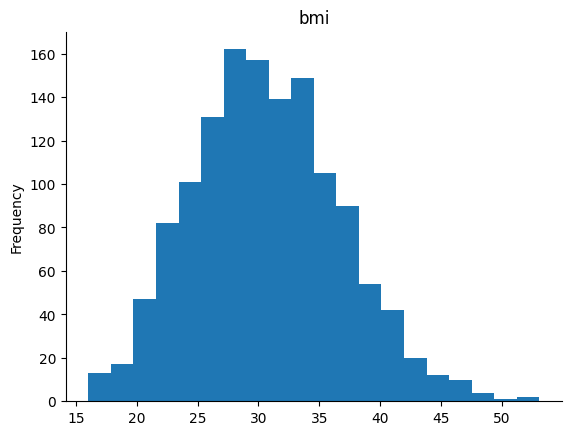

In [10]:
# It is interesting to visualize the data
# The BMI behaves like a normal distribution
from matplotlib import pyplot as plt
data['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

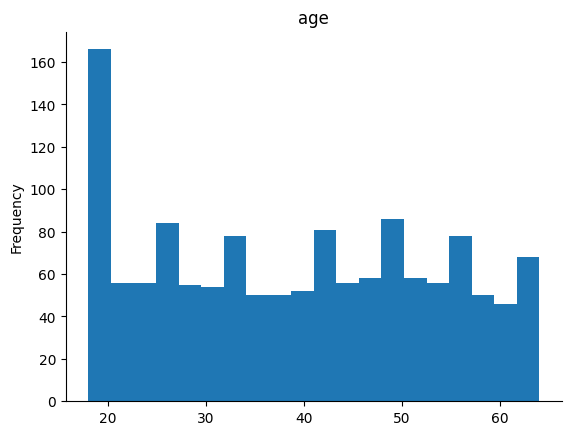

In [11]:
# And this is the PDF of the age
from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
# Extract expenses column, as it is the value we want to calculate.
X = data.drop(['expenses'],axis=1)
y = data['expenses']

In [13]:

from sklearn.model_selection import train_test_split
# Separate data into testing and training data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [15]:
# We train 4 models and compare the performance of each one
# We first create the models and then fit them to the training data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)

# Support Vector Machine
svm = SVR()
svm.fit(X_train,y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

# Gradient Boosting
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [16]:
# We predict the expenses for the test data
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

#And we create a dataframe with the actual values and the predictions
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [17]:
df1.head()

,Actual,Lr,svm,rf,gr
764,9095.07,8931.642854,9548.273266,11597.6216,11124.290442
887,5272.18,7108.658375,9492.505366,5155.3439,5849.725392
890,29330.98,36911.245886,9648.766753,28180.7051,27971.805338
1293,9301.89,9492.186731,9555.013641,10395.6956,9818.573769
259,33750.29,27005.514588,9420.413342,34388.0665,34027.954616


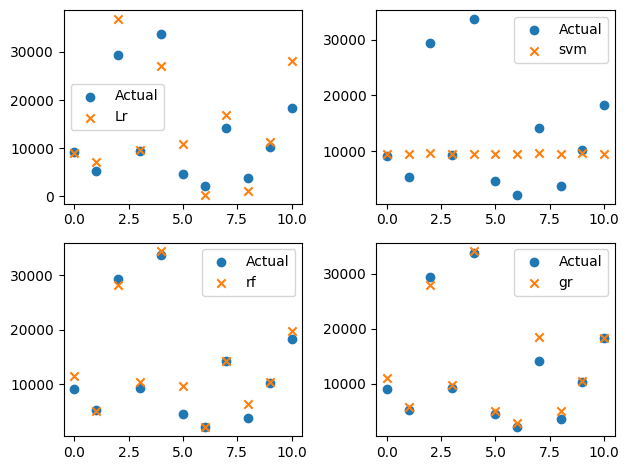

In [18]:
plt.subplot(221)
plt.scatter(range(11), df1['Actual'].iloc[0:11], label='Actual', marker='o')
plt.scatter(range(11), df1['Lr'].iloc[0:11], label="Lr", marker='x')
plt.legend()

plt.subplot(222)
plt.scatter(range(11), df1['Actual'].iloc[0:11], label='Actual', marker='o')
plt.scatter(range(11), df1['svm'].iloc[0:11], label="svm", marker='x')
plt.legend()

plt.subplot(223)
plt.scatter(range(11), df1['Actual'].iloc[0:11], label='Actual', marker='o')
plt.scatter(range(11), df1['rf'].iloc[0:11], label="rf", marker='x')
plt.legend()

plt.subplot(224)
plt.scatter(range(11), df1['Actual'].iloc[0:11], label='Actual', marker='o')
plt.scatter(range(11), df1['gr'].iloc[0:11], label="gr", marker='x')

plt.tight_layout()
plt.legend()

plt.show()

In [19]:
from sklearn import metrics

Looking at the plots we can estimate that the winner will be either Gradient Boosting or Random Forest, but we need to compare the actual scores:

In [20]:
# We get the R2 score for each model
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [21]:
print(score1,score2,score3,score4)

0.7833214205203847 -0.07229746602305465 0.8689527709834473 0.8753459214167263


In [22]:
# And the mean absolute error
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [23]:
print(s4)

2503.009731588


In [24]:
print(s1,s2,s3,s4)

4186.940106317013 8592.429900208082 2415.030382723881 2503.009731588


In [25]:
# And we can see that Gradient Boosting is the best model, with the lowest mean absolute error
model = gr
average_expenses = data['expenses'].mean()
# This is the mean absolute error in terms of the average expenses 
print(s4/average_expenses) # = 0.18875
print(average_expenses)

0.18861567879992985
13270.422414050823


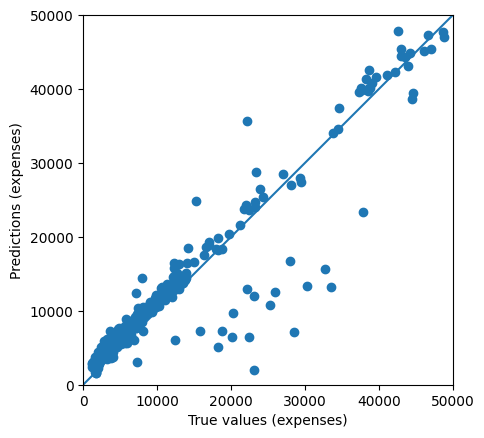

In [26]:
mae = s4
test_dataset = X_test
test_labels = y_test

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
